torch.Size([32, 32, 3])


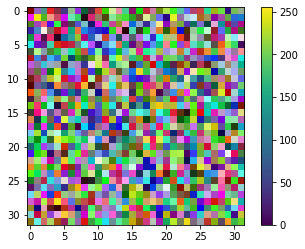

In [4]:
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt  # This is python's popular plotting library.


train_images = np.random.randint(256, size=(20,32,32,3))
train_labels = np.random.randint(2, size=(20,1))
#print(train_images.shape, train_labels.shape)
t = torch.tensor(train_images)
t = t[0].permute(1,0,2)
print(t.shape)

def showTensor(aTensor):
    plt.figure()
    plt.imshow(aTensor.numpy())
    plt.colorbar()
    plt.show()

showTensor(t)

In [6]:
class TensorData(Dataset):
    def __init__(self,x_data,y_data):
        self.x_data = torch.FloatTensor(x_data) #Incoming data is [batch,channel,height,width] so we use permute
        self.x_data = self.x_data.permute(0,3,1,2) #Used to change the order of the data read
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0] #

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len



In [3]:
import numpy as mp
import cv2
import matplotlib as plt

def loadimage(filepath="./data/base",start=1, end=2):

    CMP = []

    for i in range (start,end):
        real = cv2.imread(filepath+"/cmp_b%04d.jpg"%i)
        real = cv2.resize(real,cv2.INTER_CUBIC)

        color = cv2.imread(filepath+"/cmp_b%04d.png"%i)
        color = cv2.resize(color,cv2.INTER_CUBIC)

        CMP =

        cv2.imshow(real)


SyntaxError: invalid syntax (2073313849.py, line 16)

In [23]:
import numpy as mp
import cv2
import matplotlib as plt

start = 1; end=3; filepath="./data/base";
for i in range (start,end):
    CMP = []
    real = cv2.imread(filepath+"/cmp_b%04d.jpg"%i)
    real = cv2.resize(real, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

    color = cv2.imread(filepath+"/cmp_b%04d.png"%i,cv2.INTER_CUBIC)
    color = cv2.resize(color, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)
    

    CMP.append((color, real))
    
len(CMP)
CMP[0][0]
plt.figure()
plt.imshow(CMP[0][0])
plt.show()


TypeError: 'module' object is not callable

(256, 256, 3) (256, 256, 3)
<class 'list'>
(378, 256, 512, 3)


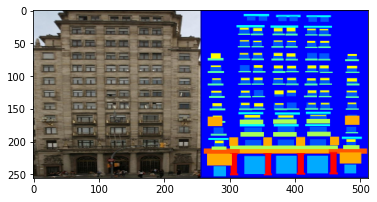

In [195]:
import numpy as mp
import cv2
import matplotlib.pyplot as plt  # This is python's popular plotting library.

start = 1; end=378; filepath="./data/base";
final = []
for i in range (start,end+1):
    real = cv2.imread(filepath+"/cmp_b%04d.jpg"%i)
    real = sizing(real,size=256,int=cv2.INTER_CUBIC)
    x_img = cv2.imread(filepath+"/cmp_b%04d.png"%i)
    x_img = sizing(x_img,size=256,int=cv2.INTER_CUBIC)
    combined = cv2.hconcat([real, x_img])
    final.append(combined)

print(real.shape,x_img.shape)
print(type(final))
print(np.asarray(final).shape)
plt.imshow(final[0])
plt.show()

def sizing (img, size,int):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (size, size),int)
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

In [205]:
import numpy as mp
import cv2
import matplotlib.pyplot as plt  # This is python's popular plotting library.
import random
from torchvision import transforms

def rand_crop (img, size):
    x = random.randint(0, img.shape[1] - size)
    y = random.randint(0, img.shape[0] - size)
    img = img[y:y+size, x:x+size]
    return img

def mirroring (img):
    if random.uniform() > 0.5:
        img = cv2.flip(img, 1)
    return img

def preprocess (image, jit, size, inter):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (size, size), inter) #resizing the images
    image = cv2.resize(image, (jit, jit)) #resizing for jittering
    image = rand_crop(image,256)
    image = mirroring(image)
    return image



start = 1; end=30; filepath="./data/base";
final = []
for i in range (start,end+1):
    real = cv2.imread(filepath+"/cmp_b%04d.jpg"%i)
    real = preprocess(real, jit=286, size=256, inter=cv2.INTER_CUBIC)
    x_img = cv2.imread(filepath+"/cmp_b%04d.png"%i)
    x_img = preprocess(x_img, jit=286, size=256, inter=cv2.INTER_CUBIC)
    combined = cv2.hconcat([real, x_img])
    final.append(combined)

#print(real.shape,x_img.shape)
#print(type(final))
#print(np.asarray(final).shape)
plt.imshow(final[6])
plt.show()



TypeError: sizing() got an unexpected keyword argument 'jit'